# **Seaborn with Matplotlib (3)**

## **3. seaborn `figure-level` function**

+ seaborn의 핵심기능, 강력한 명령입니다.
+ 4부 중 세 번째 시간입니다.
+ matplotblib으로는 매우 수고스러울 일을 줄여줍니다.
+ 그러나 손대기 어렵기도 합니다. 이유와 해결방법을 알아봅시다.

+ [지난 글](https://jehyunlee.github.io/2020/09/30/Python-DS-34-seaborn_matplotlib/)matplotlib과 친한 함수를 알아봤습니다.
    + 이런 axex 반환 함수를 `axes-level`**함수**
    + 반대로 그림 전체를 반환하는 함수를 `figure-level`**함수**라고 합니다.

+ 아래 노란 부분이 `figure-level` 함수 입니다.

![](https://user-images.githubusercontent.com/72365693/106707226-3943a880-6634-11eb-8da8-354464b37786.PNG)


+ 반환 형식 `return type`이 왜 이렇게 깔끔하지 않은지는 뒤에 보겠습니다.
+ `figure-level` 함수는 복잡한 그림을 **한 번에 편하게** 그려줍니다.

## **3.1 `figure-level` 편리함 맛보기: `FacetGrid()`**

+ seaborn에 내장된 penguins dataset에는 이런 데이터가 있습니다.
    + bill_length_mm : 부리 길이
    + bill_depth_mm : 부리 위아래 두께
    + species : 펭귄 종
    + sex : 성별
    + island : 서식지

+ 이 데이터를 산점도로 한번에 나타내고자 합니다.
    + X축 : bill_length_mm
    + Y축 : bill_depth_mm
    + 색상 : species
    + X방향 axes : island
    + Y방향 axes : sex

+ matplotlib 코드는 이렇습니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


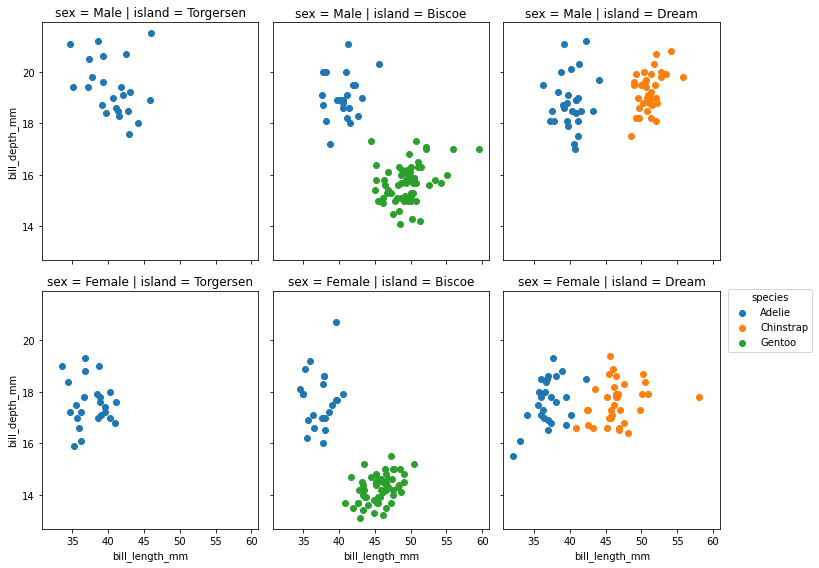

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=True, sharey=True)

# 인자별 데이터 종 수 세기
sex = penguins["sex"].dropna().unique()
island = penguins["island"].dropna().unique()
species = penguins["species"].dropna().unique()

# X방향 axes: sex
for i in range(len(sex)): 
    # Y방향 axes: island
    for j in range(len(island)):
        # 색상 : species
        for k in range(len(species)):
            try:
                axes[i][j].scatter(penguins.loc[penguins["sex"] == sex[i]].loc[penguins["island"] == island[j]].loc[penguins["species"] == species[k]]["bill_length_mm"], 
                                   penguins.loc[penguins["sex"] == sex[i]].loc[penguins["island"] == island[j]].loc[penguins["species"] == species[k]]["bill_depth_mm"])
                axes[i][j].set_title(f"sex = {sex[i]} | island = {island[j]}")
            except:  # 결측치 예외처리
                pass
		
        # 맨 아래줄에만 xlabel 추가
        axes[len(sex)-1, j].set_xlabel("bill_length_mm")

    # 맨 왼쪽에만 ylabel 추가
    axes[i, 0].set_ylabel("bill_depth_mm")

# 그래프 우측에 범례 표시
fig.legend(species,  title="species", bbox_to_anchor=(0.95, 0.5))

# 그래프 간격 조정
fig.tight_layout(rect=[0,0,0.85,1])

+ 따로 꾸민 것도 없는데 매우 번잡합니다.
    1. **인자별로 몇가지인지**를 알아내야 합니다.
    2. **결측치 처리**가 필요합니다. 안하면 에러납니다.
    3. **색상별로 따로**그려야 합니다.

+ 그런데 seaborn을 사용하면 **세 줄**만에 끝납니다.

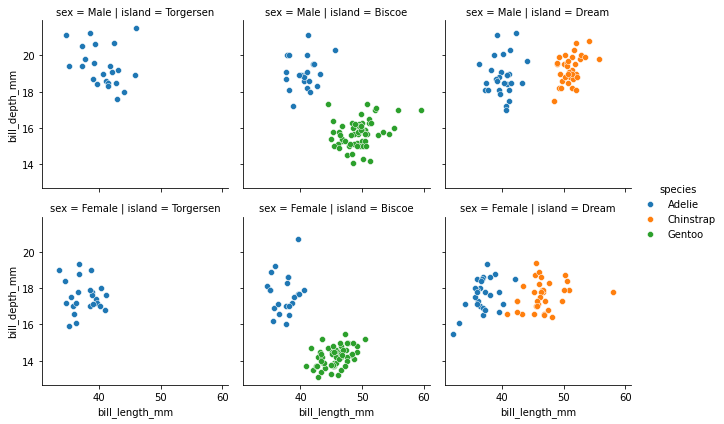

In [2]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species")
g.map(sns.scatterplot, "bill_length_mm", "bill_depth_mm")
g.add_legend()

+ `FacetGrid()`로 만든 **공간**을 `.map()`으로 **채웁니다.**
    + 데이터셋 이름,변수,이름, 그리는 방식 외에 다른 내용이 없습니다.
    + 인자가 여럿인 관계를 보기에 아주 좋습니다.

+ **밀도 함수`density plot`**로 바꾸는 것도 간단합니다.
+ 위 코드에서 `sns.scatterplot`만 `sns.kdeplot`으로 넣으면 됩니다.

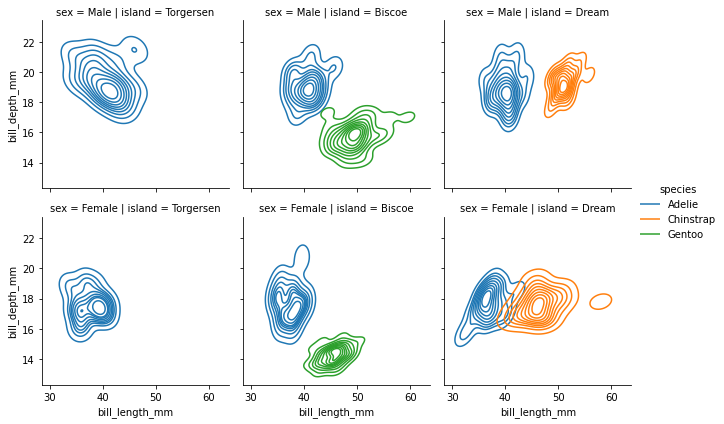

In [3]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species")
g.map(sns.kdeplot, "bill_length_mm", "bill_depth_mm")
g.add_legend()

+ `figure-level` 함수는 **복잡한 그림을 간단히 그릴 때** 매우 강력합니다.
+ 이 그림들을 matplotlib으로 그리려면 얼마나 막막할까요.

![](https://user-images.githubusercontent.com/72365693/106717248-c7269000-6642-11eb-88a6-ecaf40e78cee.PNG)

## **3.2 `figure-level`꾸미기 : `FacetGrid`**

+ **이번엔 `figure-level` 그림을 꾸며 보겠습니다.**
    1. `kdeplot` 위에 **추세선**을 겹쳐 그립니다.
        + 추세선이 중간에 않끊기면 좋겠습니다.
        + 신뢰구간은 80% 수준으로 그리고 싶습니다.
    2. **xlabel**을 "Bill Length(mm)"로 바꾸고
    3. **Ylabel**을 "Bill Depth(mm)"로 바꿉니다.

+ 공식 홈페이지의 설명에 힘입어 해냈습니다.

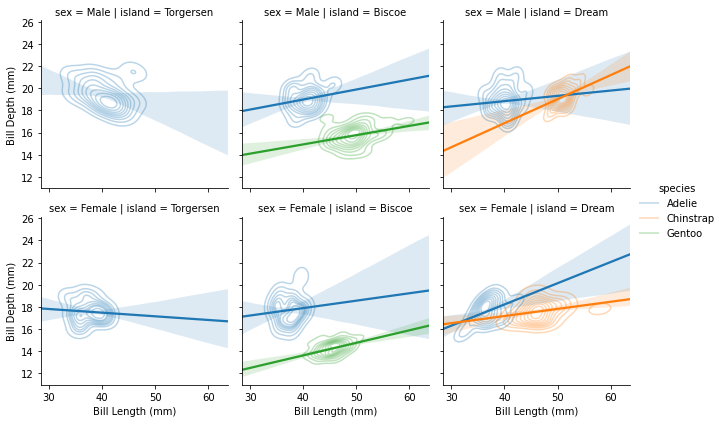

In [17]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species")
g.map(sns.kdeplot, "bill_length_mm", "bill_depth_mm", alpha=0.3) # alpha가 높을수록 배경색이 진해짐
g.map(sns.regplot, "bill_length_mm", "bill_depth_mm", truncate=False, ci=80, scatter=False)
# truncate : 실선과 배경 (True하면 맞춰 자른다)
# ci : 실선 배경 높을수록 범위가 넓어짐
# scatter : 점박이 제거(False)
g.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)")
g.add_legend()

+ **한 단계 더 꾸며보도록 합시다.**
    1. xlabel, ylabel **글자를 키우고 싶습니다.**
    2. 추세선의 **신뢰구간 80%를 적어두고** 싶습니다.
    3. axes마다 붙어있는 **title을 정리**하고 싶습니다.

+ 첫 단계에서 막혔습니다.

![](https://user-images.githubusercontent.com/72365693/106722445-5171f280-6649-11eb-8ff0-dec192d2c222.PNG)

+ xlabel, ylabel을 수정할 때 `set_axis_labels()` 를 사용했습니다.
    + 공식 홈페이지의 `FacetGrid()` 부분 가이드를 따른 것입니다.
    + 그런데 `set_axis_labels()`에 대한 **설명이 더 이상 없습니다.**

+ 혹시나 matplotlib 명령어를 넣어봅니다.
+ `fontdict=`를 적용합니다.

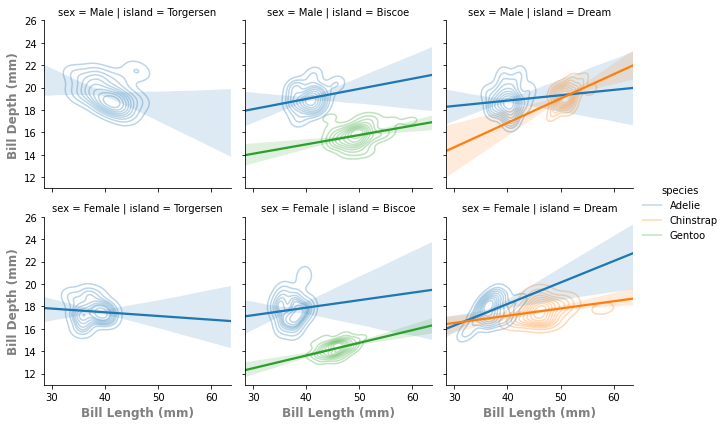

In [2]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species")
g.map(sns.kdeplot, "bill_length_mm", "bill_depth_mm", alpha=0.3)
g.map(sns.regplot, "bill_length_mm", "bill_depth_mm", truncate=False, ci=80, scatter=False)

g.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)", 
                  fontdict={"fontsize":"large", "color":"gray", "fontweight":"bold"})
g.add_legend()

+ `figure-level` **그림의 세부 설정은 도움말 찾기도 어렵습니다.**
+ 메뉴얼에 없는 내용을 상상해서 넣어야 합니다.
    + 아직은 공식 홈페이지가 충만하지 않습니다.
    + 소스코드를 뜯어봐서 기능을 확인하거나
    + **matplotlib 명령어를 숙지하고** 대응시켜 시도해야 합니다.

## **3.3 `figure-level`의 장단점**

+ [공식 튜토리얼](https://seaborn.pydata.org/tutorial.html)에 정리된 장단점은 이렇습니다.

|  | **장점** | **단점** | 
|:--------:|:--------:|:--------:|
| **1** | 데이터 변수에 따라 축공간이 생깁니다.  | 인자 제어 기능에 한계가 있습니다. | 
| **2** | 기본값으로, 범례가 그림 밖에 붙습니다. | matplotlib figure에 담기지 않습니다. | 
| **3** | figure-level 수정이 쉽습니다. | matplotlib과 API가 다릅니다. |
| **4** | figure size를 조정하는 인자가 다릅니다. |

+ 하나씩 짚어보겠습니다.

+ **(1) 데이터 변수에 따른 축공간 생성**
    + matplotblib에서 변수 갯수를 세어야 했던 것에 비해서 편리합니다.
    + seaborn에 구현된 그림을 제어하는 인자 수가 확실히 적습니다.
    + 번거롭더라도 axes에 직접 접근해서 matplotlib 명령을 쓰는게 낫습니다.

+ **(2) 그림 밖 범례 생성**
    + 그림 밖에 붙는 것은 다행입니다.
    + 그러나 통제가 안되어 심각한 갈증을 유발합니다.

+ **(3) figure-level 수정 & (4)figure size를 조정하는 인자가 다름**
    + 장점보다 단점이 크다고 생각됩니다.
    + 더 쉬운 명령어를 제공한다고 해도 결국은 또 다른 문법입니다.
    + matplotlib 명령어만 해도 정신이 없는데 말이죠.

+ 지금까지의 경험으로 이런 결론이 나옵니다.
    + **"figure-level의 가성비는 그리자마자, 손을 더 대기 전이 가장 높다."**
    + 새로운 명령어는 새로운 혼돈입니다.
    + 시각화만 붙잡고 있을게 아니라 통계분석, 머신러닝도 해야 하거든요.

## **3.4 `figure-level` 그림이 손대기 어려운 이유**

+ seaborn 코드를 뜯어보면 클래스 구조는 이렇습니다.

![](https://user-images.githubusercontent.com/72365693/106742253-247d0a00-6660-11eb-9924-e67d1b0f1dc5.PNG)

+ multi-plot grids는 Grid 클래스를 상속받는 가족입니다.
    + `FaceGrid()`, `PairGrid`, `ClusterGrid` 입니다.
    + `JoinGrid()`는 Grid를 상속받지 않습니다.
    + Grid로 만든 공간에 목적에 맞는 그림을 채웁니다.
    + `relplot()`, `displot()`, `catplot()`, `Implot` 은 1 x 1 `FacetGrid()`로 출력됩니다.

+ 그리고 **Grid 클래스는 `figure`의 wrapper입니다.**
    + 정확히는 `matplotlib.ptplot.subplots()`의 wrapper입니다.
    + 따라서 `figure`, `axes`에 적용되는 matplotlib 명령이 안통합니다.
    + 그래서 `set_axis_labels`같은 자체 명령어를 탑재하고 있습니다.
    + 하지만 보셨다시피 도움말이 충분치 않습니다.

## **3.5 `figure-level` 그림을 꾸미는 방법**

+ 한마디로 **seaborn 제공 함수는 한계가 큽니다.**
    + 기능 자체도 많이 빠져있고
    + 있는 기능도 문서화가 덜 됐습니다.
    + 이걸 믿고 쓰긴 어렵습니다.

+ 하지만 대안이 있습니다.
    + seaborn 그림을 matplotlib 그림으로 간주합니다.
    + `figure-level`객체 안으로 **한 걸음 들어갑니다.**
    + 그리고 **`figure`와 `axes`를 직접 건드립니다.**

+ 개흉 심장마사지를 상상하시면 됩니다.
+ 가슴을 열고 직접 심장을 마사지하는 겁니다.

![](https://user-images.githubusercontent.com/72365693/106743293-88540280-6661-11eb-80e5-5639207243d3.PNG)

+ 그러면 풀지 못했던 난제도 이렇게 풀립니다.

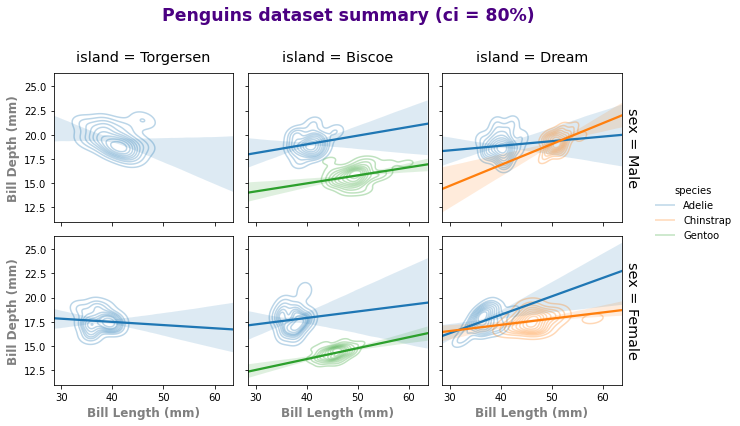

In [13]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species", margin_titles=True, despine=False)
g.map(sns.kdeplot, "bill_length_mm", "bill_depth_mm", alpha=0.3)
g.map(sns.regplot, "bill_length_mm", "bill_depth_mm", truncate=False, ci=80, scatter=False)
g.add_legend()

# xlabel, ylabel 수정
g.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)", 
                  fontdict={"fontsize":"large", "color":"gray", "fontweight":"bold"})

# axes 직접 접근, 1차원 행렬로 표현
axs = g.axes.ravel()
for i, ax in enumerate(axs):
    # 열 title 수정
    if i < 3:          # 3개의 가로줄 이름 변경 조건문
        ax.set_title(ax.get_title(), fontdict={"fontsize":"x-large", "color":"k"}, pad=12)
    # pad 글자 위치 조정

	
    # 행 title 수정
    if i%3 == 2:      # 3개를 2개로 할당 예) 성별
        sex = "Male" if i == 2 else "Female"
        ax.texts.clear()
        text = ax.annotate(f"sex = {sex}", xy=(1.02, .5), xycoords="axes fraction", rotation=270, 
                           ha="left", va="center", fontsize="x-large", color="k")

# suptitle 추가
g.fig.suptitle("Penguins dataset summary (ci = 80%)        ", 
               fontsize="xx-large", fontweight="bold", color="indigo")

# 전반적 크기 조정			   
g.fig.tight_layout(rect=[0,0,0.88,0.97])

+ **외웁시다**
    1. `figure-level` 함수는 **matplotlib과 못 섞는다.
    2. `figure-level` 함수는 `figure`와 `axes`를 한번 더 감싸고 있다.
    3. `figure-level` 함수를 수정하려면 **후벼 파는** 과정이 필요하다.